## In the Name of God
<h2>Digit recogniser using Hoda Dataset
<br>Teacher: Dr. Mohsen Hooshmand
<br>Advanced Algorithm Course Project
<br>Reza Khaleghi - 984118</h2>
<br><br>Persian digits dataset: <a href="https://github.com/amir-saniyan/HodaDatasetReader" target="_blank">Hoda Dataset Reader</a>
<br><b>Note: This dataset is free of charge for research purposes and non commercial uses only.

### Importing required packages

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from HodaDatasetReader import read_hoda_cdb, read_hoda_dataset
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from sklearn.metrics import classification_report

### Reading from Hoda dataset

################################################################################

Reading Train 60000.cdb ...
Reading Test 20000.cdb ...
type(train_images):  <class 'list'>
len(train_images):  60000

type(train_labels):  <class 'list'>
len(train_labels):  60000

----------------------------------------

type(train_images[ 0 ]): <class 'numpy.ndarray'>
train_images[ 0 ].dtype: uint8
train_images[ 0 ].min(): 0
train_images[ 0 ].max(): 255
train_images[ 0 ].shape = (HEIGHT, WIDTH): (27, 20)

type(train_labels[ 0 ]): <class 'int'>
train_labels[ 0 ]: 6

----------------------------------------

type(train_images[ 1 ]): <class 'numpy.ndarray'>
train_images[ 1 ].dtype: uint8
train_images[ 1 ].min(): 0
train_images[ 1 ].max(): 255
train_images[ 1 ].shape = (HEIGHT, WIDTH): (20, 21)

type(train_labels[ 1 ]): <class 'int'>
train_labels[ 1 ]: 5

----------------------------------------

type(train_images[ 2 ]): <class 'numpy.ndarray'>
train_images[ 2 ].dtype: uint8
train_images[ 2 ].min(): 0
trai

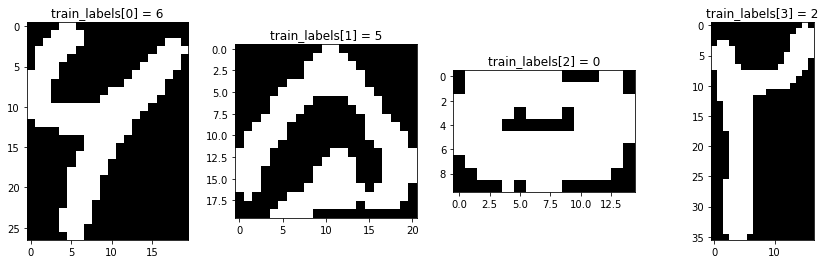

################################################################################

Reading train dataset (Train 60000.cdb)...
Reading test dataset (Test 20000.cdb)...
Done


In [2]:
print('################################################################################')
print()

print('Reading Train 60000.cdb ...')
train_images, train_labels = read_hoda_cdb('./DigitDB/Train 60000.cdb')

print('Reading Test 20000.cdb ...')
test_images, test_labels = read_hoda_cdb('./DigitDB/Test 20000.cdb')

# ******************************************************************************

print('type(train_images): ', type(train_images))
print('len(train_images): ', len(train_images))
print()

print('type(train_labels): ', type(train_labels))
print('len(train_labels): ', len(train_labels))
print()

fig = plt.figure(figsize=(15, 4))
for i in range(4):

    print('----------------------------------------')
    print()

    print('type(train_images[', i, ']):', type(train_images[i]))
    print('train_images[', i, '].dtype:', train_images[i].dtype)
    print('train_images[', i, '].min():', train_images[i].min())
    print('train_images[', i, '].max():', train_images[i].max())
    print('train_images[', i, '].shape = (HEIGHT, WIDTH):', train_images[i].shape)
    print()

    print('type(train_labels[', i, ']):', type(train_labels[i]))
    print('train_labels[', i, ']:', train_labels[i])
    print()

    fig.add_subplot(1, 4, i + 1)
    plt.title('train_labels[' + str(i) + '] = ' + str(train_labels[i]))
    plt.imshow(train_images[i], cmap='gray')

plt.show()

print('################################################################################')
print()

print('Reading train dataset (Train 60000.cdb)...')
x_train, y_train = read_hoda_dataset(dataset_path='./DigitDB/Train 60000.cdb',
                                images_height=32,
                                images_width=32,
                                one_hot=False,
                                reshape=True)

print('Reading test dataset (Test 20000.cdb)...')
x_test, y_test = read_hoda_dataset(dataset_path='./DigitDB/Test 20000.cdb',
                              images_height=32,
                              images_width=32,
                              one_hot=True,
                              reshape=False)
print("Done")

<b>Checking if the dataset imported correctly

7.0


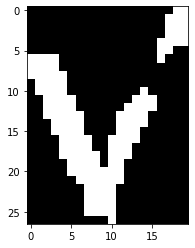

In [3]:
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 7
plt.imshow(train_images[image_index], cmap='gray')

In [4]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 32, 32, 1)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 1)
input_shape = (32, 32, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value. changing the range from 0-255 to 0-1
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 32, 32, 1)
Number of images in x_train 60000
Number of images in x_test 20000


In [5]:
# Creating a Sequential Model and adding the layers
model = []
model.append(Sequential())
model.append(Sequential())
model.append(Sequential())
model.append(Sequential())

dropout = [0.1,0.2,0.5,0.8]
for i in range(4):
    model[i].add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
    model[i].add(MaxPooling2D(pool_size=(2, 2)))
    model[i].add(Flatten()) # Flattening the 2D arrays for fully connected layers
    model[i].add(Dense(128, activation=tf.nn.relu))
    model[i].add(Dropout(dropout[i]))
    model[i].add(Dense(10,activation=tf.nn.softmax))

<b>Fitting the model with 10 epochs.
<br>Note: Increasing epochs will increase accuracy but also increases processing time

In [6]:
for i in range(4):
    model[i].compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model[i].fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3613 - accuracy: 0.8970
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0959 - accuracy: 0.9720
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0601 - accuracy: 0.9829
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0452 - accuracy: 0.9863
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0374 - accuracy: 0.9882
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0306 - accuracy: 0.9902
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0283 - accuracy: 0.9909
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0232 - accuracy: 0.9924
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0216 - accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - l

In [7]:
lst = []
for i in y_test:
    for j in range(10):
        if i[j] == 1:
            lst.append(j)
final_y_test = np.array(lst)

<b>Change the "image_index" variable amount in the range of test to show the predicted (here the test set range is between 0-19999)

Predicted label: 6 
With the probability of 0.9999989
Predicted label: 6 
With the probability of 0.9999999
Predicted label: 6 
With the probability of 0.9999665
Predicted label: 6 
With the probability of 0.99997735


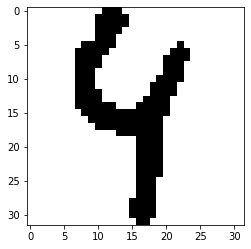

In [9]:
image_index = 12111
plt.imshow(x_test[image_index].reshape(32, 32),cmap='Greys')
for i in range(4):
    pred = model[i].predict(x_test[image_index].reshape(1, 32, 32, 1))
    # Maximum probability
    print("Predicted label:",pred.argmax(),"\nWith the probability of",pred[0][pred.argmax()])

In [10]:
y_pred = []
for i in range(4):
    print("Model",i)
    results = model[i].evaluate(x_test,final_y_test,batch_size=128)
    y_pred.append(model[i].predict(x_test))
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++")

Model 0
157/157 [==============================] - 1s 7ms/step - loss: 0.0791 - accuracy: 0.9809
+++++++++++++++++++++++++++++++++++++++++++++++++++++++
Model 1
157/157 [==============================] - 1s 7ms/step - loss: 0.0805 - accuracy: 0.9791
+++++++++++++++++++++++++++++++++++++++++++++++++++++++
Model 2
157/157 [==============================] - 1s 8ms/step - loss: 0.0864 - accuracy: 0.9758
+++++++++++++++++++++++++++++++++++++++++++++++++++++++
Model 3
157/157 [==============================] - 1s 8ms/step - loss: 0.1607 - accuracy: 0.9557
+++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [12]:
for j in range(4):
    converted_y_pred = []
    for i in y_pred[j]:
        converted_y_pred.append(np.argmax(i))
    final_y_pred = np.array(converted_y_pred)
    print(classification_report(final_y_test,final_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2000
           1       0.97      1.00      0.98      2000
           2       0.94      0.99      0.96      2000
           3       0.98      0.94      0.96      2000
           4       0.97      0.98      0.97      2000
           5       0.98      0.99      0.99      2000
           6       0.99      0.98      0.98      2000
           7       0.99      0.99      0.99      2000
           8       0.99      0.99      0.99      2000
           9       0.99      0.97      0.98      2000

    accuracy                           0.98     20000
   macro avg       0.98      0.98      0.98     20000
weighted avg       0.98      0.98      0.98     20000

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2000
           1       0.97      1.00      0.98      2000
           2       0.94      0.98      0.96      2000
           3       0.97 